In [2]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')

# ARIMA 모델의 p,q,d 추정
베이스라인의 ARIMA 모델을 확인했을 때 p, d, q가 각각 2, 1, 3이었습니다.  
베이스라인을 바탕으로 제출을 할 경우 낮은 성능의 점수를 확인할 수 있습니다.  

이는 ARIMA 모델에 필요한 파라미터를 적합하지 않게 설정했기 때문입니다.   
적합한 파라미터를 설정할 경우 베이스라인보다 더 좋은 성능의 모델을 얻을 수 있습니다.  

아래에서 적합한 파라미터 p,d,q를 설정하는 방법에 대해 알아보겠습니다.  

# ACF 와 PACF 플롯을 통한 p, q 추정

ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)는 시계열 데이터의 자기상관을 측정하는 데 사용되며, ARIMA 모델의 매개변수 p와 q를 결정하는 데 도움을 줍니다.   

p: AR 모델의 차수로, 시계열 데이터의 과거 값들이 현재 값에 미치는 영향의 길이를 나타냅니다.   
PACF 플롯에서 시차(lag)에 대한 부분 자기상관이 처음으로 0 주변에 떨어지는 지점을 p 값으로 사용할 수 있습니다.

q: MA 모델의 차수로, 시계열의 과거 예측 오차가 현재 값에 미치는 영향의 길이를 나타냅니다.  
ACF 플롯에서 시차에 대한 자기상관이 처음으로 0 주변에 떨어지는 지점을 q 값으로 사용할 수 있습니다.

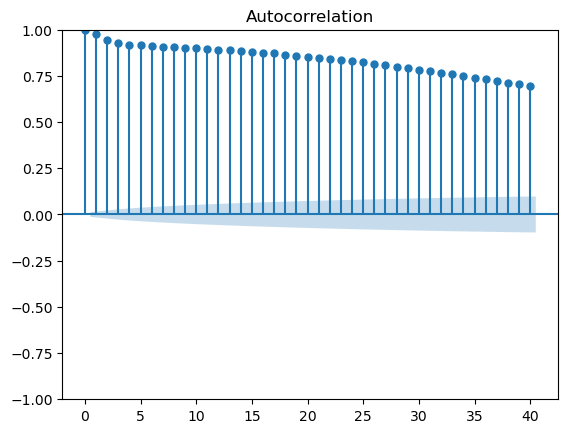

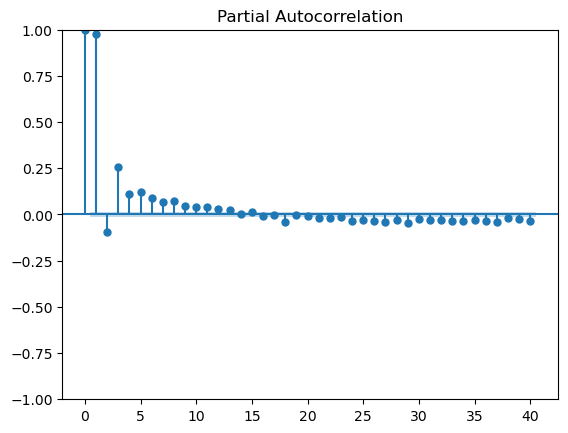

In [6]:
# ACF 플롯
plot_acf(train['평균기온'], lags=40)
plt.show()

# PACF 플롯
plot_pacf(train['평균기온'], lags=40)
plt.show()

ACF 플롯: 이 플롯은 점차적으로 감소하는 패턴을 보이며, 많은 시차(lags)에서 유의미한 자기상관을 보이고 있습니다.  
이는 데이터에 강한 계절성 또는 주기성이 있음을 나타냅니다.   
ACF가 느리게 감소하는 것은 일반적으로 MA(q) 모델의 높은 차수를 필요로 하지 않음을 의미합니다.   

PACF 플롯: 이 플롯에서는 첫 번째 시차 이후 급격히 감소하는 것을 볼 수 있습니다.   
첫 번째 시차에서의 급격한 하락은 AR(1) 모델이 적합할 수 있음을 나타내지만, 이후에도 여러 시차에서 유의미한 부분 자기상관이 관찰되므로, AR 모델의 차수(p)가 1 이상일 가능성이 있습니다.   

# ADF 검정을 통한 차분 차수 d 결정

ARIMA(AutoRegressive Integrated Moving Average) 모델에서 'd'는 차분(differencing)의 차수를 나타냅니다.   
차분은 비정상 시계열 데이터를 정상 시계열로 변환하기 위해 사용되는 기술로, 연속된 관측값들의 차이를 계산합니다.  

Augmented Dickey-Fuller (ADF) 테스트는 시계열 데이터의 단위근(unit root)을 테스트하여 데이터가 정상성(stationarity)을 가지는지를 판단합니다. 정상 시계열이라면 시계열의 통계적 속성들이 시간에 따라 일정하게 유지됩니다.

In [5]:
# ADF 테스트 수행
adf_result = adfuller(train['평균기온'])
print(f'ADF 통계: {adf_result[0]}')
print(f'p값: {adf_result[1]}')

ADF 통계: -16.61918613006998
p값: 1.7040000780817657e-29


여기서 ADF Statistic 값이 매우 낮습니다.   
그리고 p값도 약 1.7e-29로 매우 낮은 편입니다.   
p값을 보았을 때 시계열 데이터가 안정적이지 않고 추세를 가지고 있다는 귀무 가설을 기각할 수 있습니다.    
  
따라서 차분을 수행할 필요는 없는 것으로 보입니다.